## Regularized Linear Regression

[ 1.84230614]
[ 9.97495556]


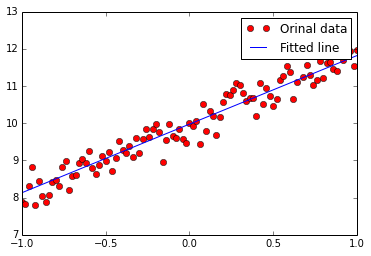

In [2]:
#!/usr/bin/env python
# h(x)=b+wx
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


def model(X, w, b):
    return tf.mul(X, w) + b


trX = np.linspace(-1, 1, 101).astype(np.float32)
# create a y value which is approximately linear but with some random noise
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33 + 10

# create a shared variable (like theano.shared) for the weight matrix
w = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
# choose Regularization Parameter to 0.05
cost = tf.reduce_mean(tf.square(trY-model(trX, w, b)) + 0.05*np.sum(w))

# construct an optimizer to minimize cost and fit line to my data
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize variables (in this case just variable W)
    tf.initialize_all_variables().run()

    for i in range(1000):
        sess.run(train_op)

    print(sess.run(w))  # It should be something around 2
    print(sess.run(b))  # It should be something around 10
    
    plt.plot(trX, trY, "ro", label="Orinal data")
    plt.plot(trX, sess.run(w)*trX + sess.run(b), label="Fitted line")
    plt.legend()
    plt.show()



## Regularized Multi-variable Linear Regression

In [3]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


def model(X, w, b):
    return tf.mul(w, X) + b

trX = np.mgrid[-1:1:0.01, -10:10:0.1].reshape(2, -1).T
trW = np.array([3, 5])
trY = trW*trX + np.random.randn(*trX.shape) + [20, 100]

w = tf.Variable(np.array([1., 1.]).astype(np.float32))
b = tf.Variable(np.array([[1., 1.]]).astype(np.float32))
# Choose Regularization Parameter to 0.05
cost = tf.reduce_mean(tf.square(trY-model(trX, w, b)) + 0.05*np.sum(w)) 

# construct an optimizer to minimize cost and fit line to my data
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize variables (in this case just variable W)
    tf.initialize_all_variables().run()

    for i in range(1000):
        sess.run(train_op)

    print "w should be something around [3, 5]: ", sess.run(w)
    print "b should be something around [20,100]:", sess.run(b)



w should be something around [3, 5]:  [ 2.92737865  4.99970579]
b should be something around [20,100]: [[  20.01066017  100.00799561]]
